In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_excel('/content/Data_Train (1).xlsx')

train_data


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_data = pd.read_excel('/content/Test_set (1).xlsx')
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


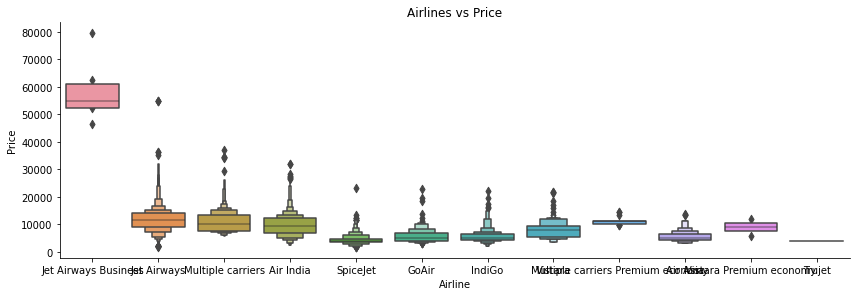

<Figure size 2160x1800 with 0 Axes>

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.title('Airlines vs Price')
plt.figure(figsize=(30,25))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


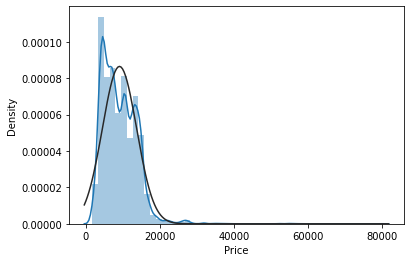

In [ ]:
sns.distplot(train_data.Price, fit=norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


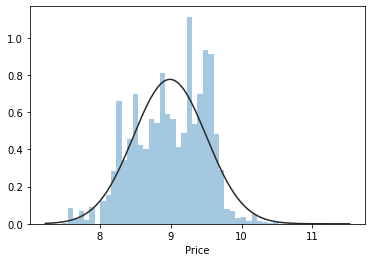

In [ ]:
log_price = np.log(train_data.Price)
sns.distplot(log_price, fit=norm, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


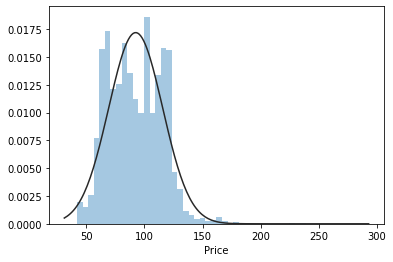

In [ ]:
rt_price = np.sqrt(train_data.Price)
sns.distplot(rt_price, fit=norm, kde=False)

In [ ]:
train_data.Price = log_price

## Exploratory Data Analysis
Everything but the response variable is a categorical feature. To choose whether to one-hot encode or label encode the categorical features, we need to analyze each feature.

In [ ]:
print("Number of unique airlines: ", train_data['Airline'].nunique())

Number of unique airlines:  12


In [ ]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

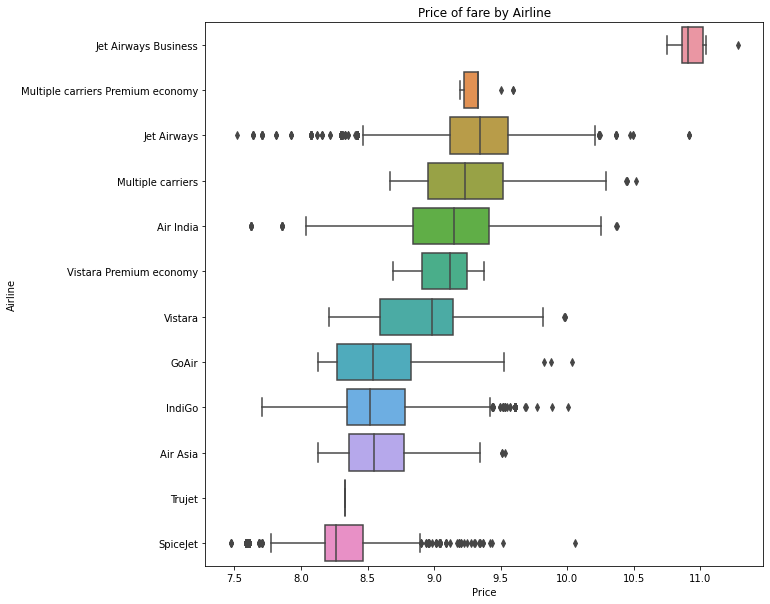

In [ ]:
def plot_price(feature, df=train_data, target='Price', width=10, height=10):
    fig = plt.figure(figsize=(width, height))
    plt.title('Price of fare by %s' %(feature))
    price_order = df.groupby(feature)[target].mean()\
                    .sort_values(ascending=False).index.values
    sns.boxplot(data=df, y=feature, x=target, order=price_order)
    
plot_price('Airline')

Number of unique Dates:  44


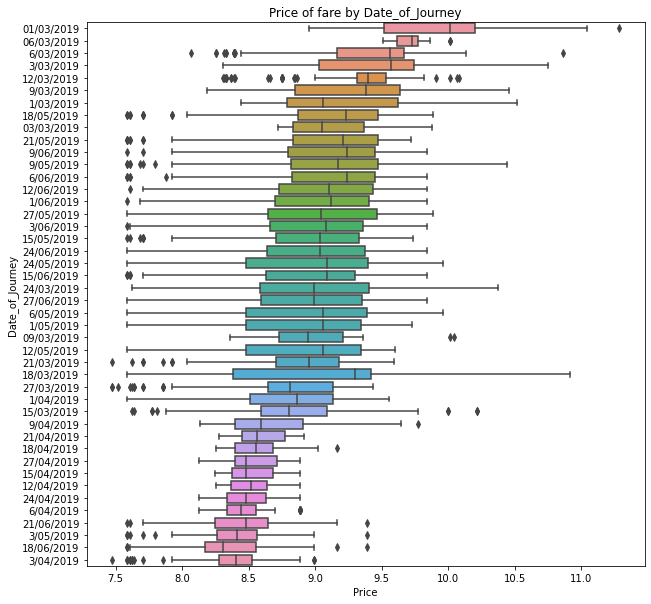

In [ ]:
print("Number of unique Dates: ", train_data['Date_of_Journey'].nunique())
plot_price('Date_of_Journey')

In [ ]:
date = pd.DatetimeIndex(train_data['Date_of_Journey'])
train_data['Date_of_Journey'] = date.date
train_data['Weekday'] = train_data['Date_of_Journey']\
                        .apply(lambda x: calendar.day_name[x.weekday()])
train_data['Month'] = date.month
train_data['Month'] = train_data['Month'].apply(lambda x: calendar.month_abbr[x])
train_data['Day'] = date.day
train_data['Year'] = date.year
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,Sunday,Mar,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,Saturday,Jan,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,Friday,Sep,6,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,Thursday,Dec,5,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,Thursday,Jan,3,2019


Text(0.5, 1.0, 'Price of fare by Month')

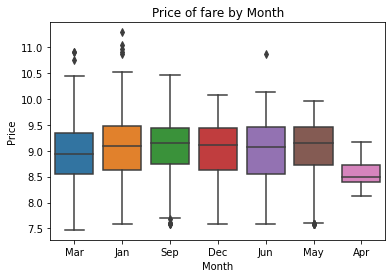

In [ ]:
sns.boxplot(data=train_data, y='Price', x='Month')
plt.title('Price of fare by %s' %('Month'))

Text(0.5, 1.0, 'Price of fare by Weekday')

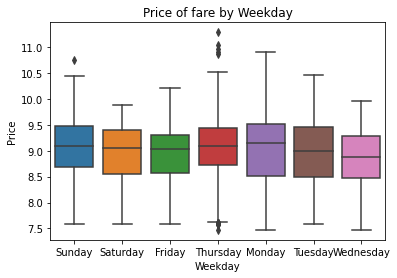

In [ ]:
sns.boxplot(data=train_data, y='Price', x='Weekday')
plt.title('Price of fare by %s' %('Weekday'))

Text(0.5, 1.0, 'Price of fare by Day')

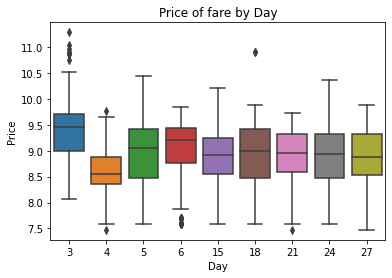

In [ ]:
sns.boxplot(data=train_data, y='Price', x='Day')
plt.title('Price of fare by %s' %('Day'))

Text(0.5, 1.0, 'Price of fare by Source')

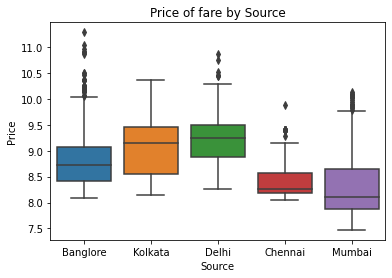

In [ ]:
sns.boxplot(data=train_data, y='Price', x='Source')
plt.title('Price of fare by %s' %('Source'))

Text(0.5, 1.0, 'Price of fare by Destination')

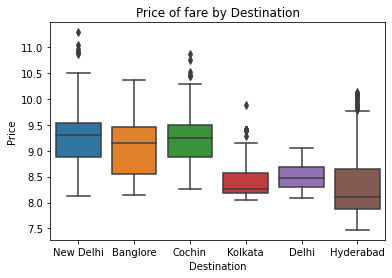

In [ ]:
sns.boxplot(data=train_data, y='Price', x='Destination')
plt.title('Price of fare by %s' %('Destination'))

In [ ]:
train_data['Source_Dest'] = train_data[['Source','Destination']].apply(lambda x: '_'.join(x), axis=1)
train_data['Source_Dest'].unique()

array(['Banglore_New Delhi', 'Kolkata_Banglore', 'Delhi_Cochin',
       'Chennai_Kolkata', 'Banglore_Delhi', 'Mumbai_Hyderabad'],
      dtype=object)

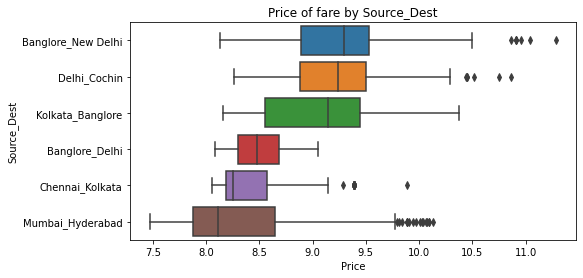

In [ ]:
plot_price('Source_Dest', height=4, width=8)

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
test = train_data['Duration'].str.split(' ', expand=True)
train_data['Duration_Hour'] = pd.to_numeric(test[0].str.extract('(\d+)', expand=False))
train_data['Duration_Minutes'] = pd.to_numeric(test[1].str.extract('(\d+)', expand=False))
train_data.fillna(0, inplace=True)
train_data['Duration_Total'] = train_data['Duration_Hour']*60 + train_data['Duration_Minutes']
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Day,Year,Source_Dest,Duration_Hour,Duration_Minutes,Duration_Total
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,Sunday,Mar,24,2019,Banglore_New Delhi,2,50.0,170.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,Saturday,Jan,5,2019,Kolkata_Banglore,7,25.0,445.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,Friday,Sep,6,2019,Delhi_Cochin,19,0.0,1140.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,Thursday,Dec,5,2019,Kolkata_Banglore,5,25.0,325.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,Thursday,Jan,3,2019,Banglore_New Delhi,4,45.0,285.0


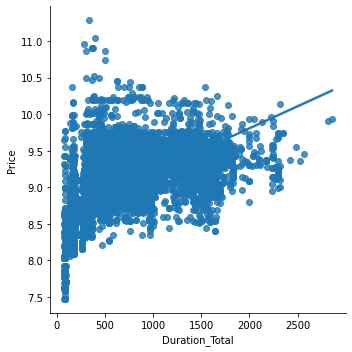

In [ ]:
sns.lmplot(data=train_data, x='Duration_Total', y='Price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


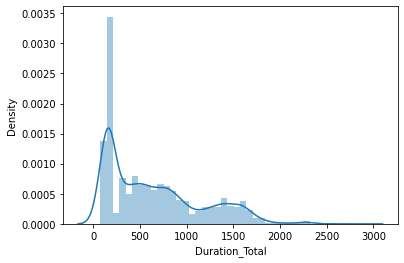

In [ ]:
sns.distplot(train_data['Duration_Total'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


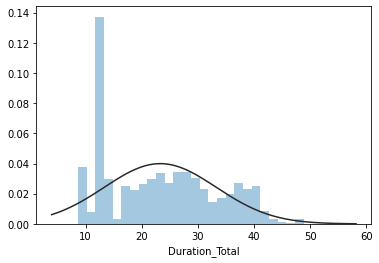

In [ ]:
sns.distplot(np.sqrt(train_data['Duration_Total']), fit=norm, kde=False)

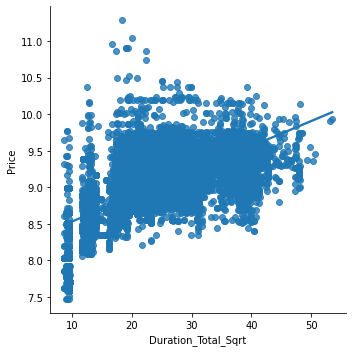

In [ ]:
# temp = train_data.copy()
train_data['Duration_Total_Sqrt'] = np.sqrt(train_data['Duration_Total'])
sns.lmplot(data=train_data, x='Duration_Total_Sqrt', y='Price')

In [ ]:
idx = train_data[train_data['Total_Stops']==0].index
train_data.loc[idx,'Total_Stops'] = train_data['Total_Stops'].mode()[0]
train_data.loc[idx]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Weekday,Month,Day,Year,Source_Dest,Duration_Hour,Duration_Minutes,Duration_Total,Duration_Total_Sqrt
9039,Air India,2019-06-05,Delhi,Cochin,0,09:45,09:25 07 May,23h 40m,1 stop,No info,8.919988,Wednesday,Jun,5,2019,Delhi_Cochin,23,40.0,1420.0,37.682887


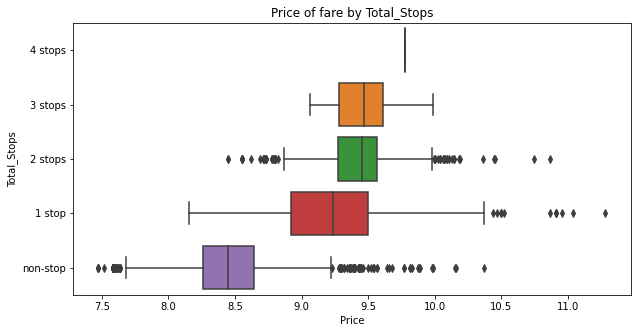

In [ ]:
plot_price('Total_Stops', height=5)

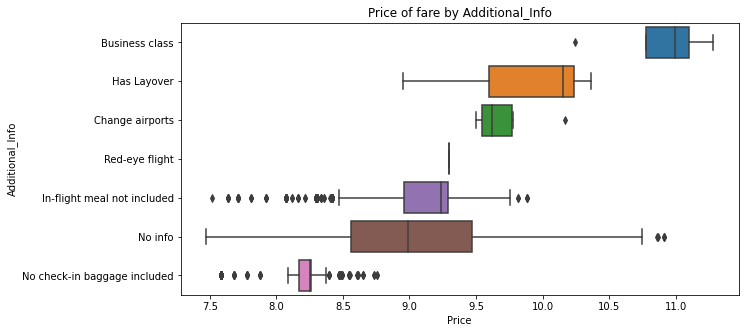

In [ ]:
train_data['Additional_Info'] = train_data['Additional_Info']\
                                    .replace({'No Info': 'No info',
                                              '1 Short layover': 'Has Layover',
                                              '1 Long layover': 'Has Layover',
                                              '2 Long layover': 'Has Layover'})
plot_price('Additional_Info', height=5)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Date_of_Journey      10683 non-null  object 
 2   Source               10683 non-null  object 
 3   Destination          10683 non-null  object 
 4   Route                10683 non-null  object 
 5   Dep_Time             10683 non-null  object 
 6   Arrival_Time         10683 non-null  object 
 7   Duration             10683 non-null  object 
 8   Total_Stops          10683 non-null  object 
 9   Additional_Info      10683 non-null  object 
 10  Price                10683 non-null  float64
 11  Weekday              10683 non-null  object 
 12  Month                10683 non-null  object 
 13  Day                  10683 non-null  int64  
 14  Year                 10683 non-null  int64  
 15  Source_Dest          10683 non-null 

In [ ]:
train_data['Total_Stops'] = train_data['Total_Stops']\
                                    .replace({'non-stop': 0,
                                              '1 stop': 1,
                                              '2 stops': 2,
                                              '3 stops': 3,
                                              '4 stops': 4})

In [ ]:
train_data['Avg_Duration'] = train_data['Duration_Total'] / (train_data['Total_Stops'] + 1)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Weekday,Month,Day,Year,Source_Dest,Duration_Hour,Duration_Minutes,Duration_Total,Duration_Total_Sqrt,Avg_Duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,Sunday,Mar,24,2019,Banglore_New Delhi,2,50.0,170.0,13.038405,170.000000
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,Saturday,Jan,5,2019,Kolkata_Banglore,7,25.0,445.0,21.095023,148.333333
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,...,Friday,Sep,6,2019,Delhi_Cochin,19,0.0,1140.0,33.763886,380.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,Thursday,Dec,5,2019,Kolkata_Banglore,5,25.0,325.0,18.027756,162.500000
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,Thursday,Jan,3,2019,Banglore_New Delhi,4,45.0,285.0,16.881943,142.500000


441


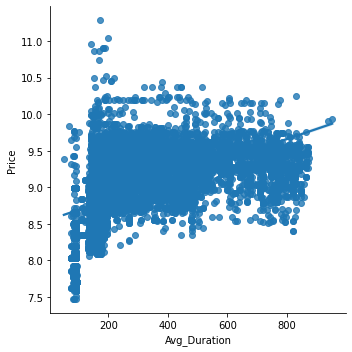

In [ ]:
print(train_data['Avg_Duration'].nunique())
sns.lmplot(data=train_data, x='Avg_Duration', y='Price')

## Test Data set
Whatever was done to the training data set will also be done to the test data set so that they have the exact same features.

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              2671 non-null   object 
 1   Date_of_Journey      2671 non-null   object 
 2   Source               2671 non-null   object 
 3   Destination          2671 non-null   object 
 4   Route                2671 non-null   object 
 5   Dep_Time             2671 non-null   object 
 6   Arrival_Time         2671 non-null   object 
 7   Duration             2671 non-null   object 
 8   Total_Stops          2671 non-null   int64  
 9   Additional_Info      2671 non-null   object 
 10  Weekday              2671 non-null   object 
 11  Month                2671 non-null   object 
 12  Day                  2671 non-null   int64  
 13  Year                 2671 non-null   int64  
 14  Duration_Hour        2671 non-null   int64  
 15  Duration_Minutes     2671 non-null   f

In [ ]:
date = pd.DatetimeIndex(test_data['Date_of_Journey'])
test_data['Date_of_Journey'] = date.date
test_data['Weekday'] = test_data['Date_of_Journey']\
                        .apply(lambda x: calendar.day_name[x.weekday()])
test_data['Month'] = date.month
test_data['Month'] = test_data['Month'].apply(lambda x: calendar.month_abbr[x])
test_data['Day'] = date.day
test_data['Year'] = date.year
test = test_data['Duration'].str.split(' ', expand=True)
test_data['Duration_Hour'] = pd.to_numeric(test[0].str.extract('(\d+)', expand=False))
test_data['Duration_Minutes'] = pd.to_numeric(test[1].str.extract('(\d+)', expand=False))
test_data.fillna(0, inplace=True)
test_data['Duration_Total'] = test_data['Duration_Hour']*60 + test_data['Duration_Minutes']
test_data['Duration_Total_Sqrt'] = np.sqrt(test_data['Duration_Total'])
test_data['Source_Dest'] = test_data[['Source','Destination']].apply(lambda x: '_'.join(x), axis=1)
test_data['Additional_Info'] = test_data['Additional_Info']\
                                    .replace({'No Info': 'No info',
                                              '1 Short layover': 'Has Layover',
                                              '1 Long layover': 'Has Layover',
                                              '2 Long layover': 'Has Layover'})
test_data['Additional_Info'].value_counts()
test_data['Total_Stops'] = test_data['Total_Stops']\
                                    .replace({'non-stop': 0,
                                              '1 stop': 1,
                                              '2 stops': 2,
                                              '3 stops': 3,
                                              '4 stops': 4})
test_data['Avg_Duration'] = test_data['Duration_Total'] / (test_data['Total_Stops'] + 1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Weekday,Month,Day,Year,Duration_Hour,Duration_Minutes,Duration_Total,Duration_Total_Sqrt,Source_Dest,Avg_Duration
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,Thursday,Jun,6,2019,10,55.0,655.0,25.592968,Delhi_Cochin,327.5
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,Thursday,Dec,5,2019,4,0.0,240.0,15.491933,Kolkata_Banglore,120.0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,Tuesday,May,21,2019,23,45.0,1425.0,37.749172,Delhi_Cochin,712.5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,Tuesday,May,21,2019,13,0.0,780.0,27.928480,Delhi_Cochin,390.0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,Monday,Jun,24,2019,2,50.0,170.0,13.038405,Banglore_Delhi,170.0


In [ ]:
diff_sd = list(set(test_data['Route']) - set(train_data['Route']))
diff_sd

['CCU → IXR → BBI → BOM → BLR',
 'BLR → TRV → DEL',
 'BOM → IXC → DEL → HYD',
 'BOM → VGA → TIR → HYD']

In [ ]:
diff = list(set(test_data['Airline']) - set(train_data['Airline']))
diff

[]

In [ ]:
diff_layover = list(set(test_data['Additional_Info']) - set(train_data['Additional_Info']))
diff_layover

[]

In [ ]:
diff_sd = list(set(test_data['Source_Dest']) - set(train_data['Source_Dest']))
diff_sd

[]

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              2671 non-null   object 
 1   Date_of_Journey      2671 non-null   object 
 2   Source               2671 non-null   object 
 3   Destination          2671 non-null   object 
 4   Route                2671 non-null   object 
 5   Dep_Time             2671 non-null   object 
 6   Arrival_Time         2671 non-null   object 
 7   Duration             2671 non-null   object 
 8   Total_Stops          2671 non-null   int64  
 9   Additional_Info      2671 non-null   object 
 10  Weekday              2671 non-null   object 
 11  Month                2671 non-null   object 
 12  Day                  2671 non-null   int64  
 13  Year                 2671 non-null   int64  
 14  Duration_Hour        2671 non-null   int64  
 15  Duration_Minutes     2671 non-null   f

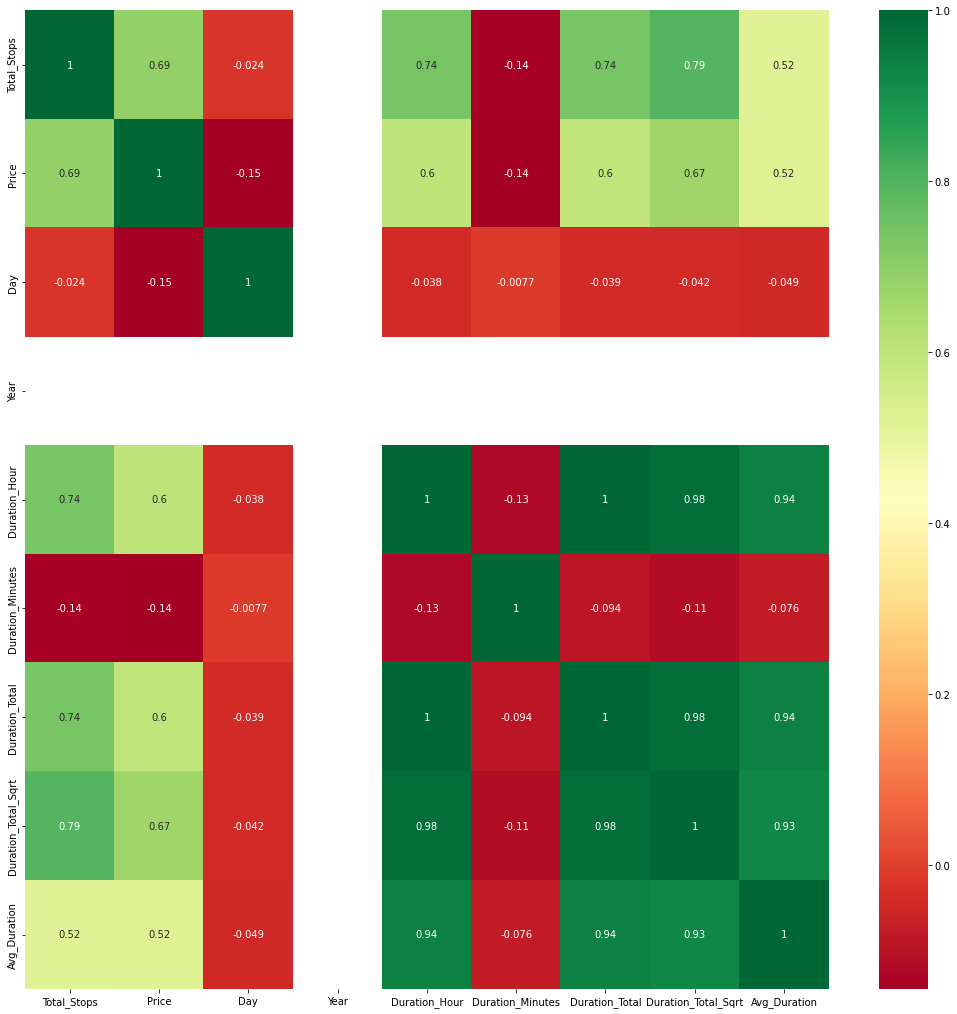

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Encoding
Combine

The train and test data are combined for easy one-hot and label encoding

In [ ]:
test_clean = test_data.copy()
train_clean = train_data.copy()
temp = pd.concat([train_clean, test_clean])

In [ ]:
drop_col = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 
            'Duration', 'Duration_Hour', 'Duration_Minutes']
temp = temp.drop(columns=drop_col, axis=1)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13354 non-null  object 
 1   Source               13354 non-null  object 
 2   Destination          13354 non-null  object 
 3   Total_Stops          13354 non-null  int64  
 4   Additional_Info      13354 non-null  object 
 5   Price                10683 non-null  float64
 6   Weekday              13354 non-null  object 
 7   Month                13354 non-null  object 
 8   Day                  13354 non-null  int64  
 9   Year                 13354 non-null  int64  
 10  Source_Dest          13354 non-null  object 
 11  Duration_Total       13354 non-null  float64
 12  Duration_Total_Sqrt  13354 non-null  float64
 13  Avg_Duration         13354 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.5+ MB


In [ ]:
to_one_hot = ['Airline', 'Source', 'Destination',
              'Weekday', 'Month', 'Source_Dest']

temp = pd.concat([temp, pd.get_dummies(temp[to_one_hot])], axis=1)
temp.drop(to_one_hot, axis=1, inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                13354 non-null  int64  
 1   Additional_Info                            13354 non-null  object 
 2   Price                                      10683 non-null  float64
 3   Day                                        13354 non-null  int64  
 4   Year                                       13354 non-null  int64  
 5   Duration_Total                             13354 non-null  float64
 6   Duration_Total_Sqrt                        13354 non-null  float64
 7   Avg_Duration                               13354 non-null  float64
 8   Airline_Air Asia                           13354 non-null  uint8  
 9   Airline_Air India                          13354 non-null  uint8  
 10  Airline_GoAir          

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(temp['Additional_Info'])
temp['Additional_Info'] = le.fit_transform(temp['Additional_Info'])
temp.head()

,Total_Stops,Additional_Info,Price,Day,Year,Duration_Total,Duration_Total_Sqrt,Avg_Duration,Airline_Air Asia,Airline_Air India,...,Month_Jun,Month_Mar,Month_May,Month_Sep,Source_Dest_Banglore_Delhi,Source_Dest_Banglore_New Delhi,Source_Dest_Chennai_Kolkata,Source_Dest_Delhi_Cochin,Source_Dest_Kolkata_Banglore,Source_Dest_Mumbai_Hyderabad
0,0,5,8.267962,24,2019,170.0,13.038405,170.000000,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,5,8.944028,5,2019,445.0,21.095023,148.333333,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,5,9.538348,6,2019,1140.0,33.763886,380.000000,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,5,8.735204,5,2019,325.0,18.027756,162.500000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5,9.495670,3,2019,285.0,16.881943,142.500000,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_clean = temp[temp['Price'].notnull()]
test_clean = temp[temp['Price'].isnull()]
test_clean = test_clean.drop(columns='Price')
(train_clean.shape, test_clean.shape)

((10683, 51), (2671, 50))

## Train and Predict

In [ ]:
y = train_clean.Price
X = train_clean.drop(columns='Price', axis=1)
X.head(10)

,Total_Stops,Additional_Info,Day,Year,Duration_Total,Duration_Total_Sqrt,Avg_Duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Month_Jun,Month_Mar,Month_May,Month_Sep,Source_Dest_Banglore_Delhi,Source_Dest_Banglore_New Delhi,Source_Dest_Chennai_Kolkata,Source_Dest_Delhi_Cochin,Source_Dest_Kolkata_Banglore,Source_Dest_Mumbai_Hyderabad
0,0,5,24,2019,170.0,13.038405,170.000000,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,5,5,2019,445.0,21.095023,148.333333,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2,5,6,2019,1140.0,33.763886,380.000000,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,5,5,2019,325.0,18.027756,162.500000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,5,3,2019,285.0,16.881943,142.500000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,5,24,2019,145.0,12.041595,145.000000,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,3,3,2019,930.0,30.495901,465.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,1,5,3,2019,1265.0,35.566838,632.500000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,3,3,2019,1530.0,39.115214,765.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,5,27,2019,470.0,21.679483,235.000000,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
pd.DataFrame(np.exp(y)).head(10).T

,0,1,2,3,4,5,6,7,8,9
Price,3897.0,7662.0,13882.0,6218.0,13302.0,3873.0,11087.0,22270.0,11087.0,8625.0


## Predictions using validation data

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

def validation_predictions(model, name):
    new_model = model.fit(X_train, y_train)
    pred = np.exp(new_model.predict(X_valid))
    print("============= %s and Shuffle Split =============" %name)
    print("Accuracy: %f" %(r2_score(np.exp(y_valid), pred)))
    print("MSE: %f" %(mean_squared_error(np.exp(y_valid), pred)))
    print("MAE: %f" %(mean_absolute_error(np.exp(y_valid), pred)))
    
    new_model = model.fit(X, y)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    cvs = cross_val_score(new_model, X, y, cv=cv)
    print('Shuffle and cross validate: %s \nAverage: %.2f' %(cvs, cvs.mean()))

In [ ]:
lr_model = LinearRegression()
validation_predictions(lr_model, 'Linear Regression')

============= Linear Regression and Shuffle Split =============
Accuracy: 0.640988
MSE: 7808700.914015
MAE: 1639.848586
Shuffle and cross validate: [0.77018428 0.79226539 0.77926645 0.7792432  0.77375419] 
Average: 0.78


In [ ]:
rf_model = RandomForestRegressor(random_state=0)
# rf_model.fit(X_train, y_train)
validation_predictions(rf_model, 'Random Forest Regressor')
# print('Training accuracy: %.2f \nTesting accuracy: %.2f' %(rf_model.score(X_train, y_train), rf_model.score(X_valid,y_valid)))

============= Random Forest Regressor and Shuffle Split =============
Accuracy: 0.850219
MSE: 3257807.498684
MAE: 894.104850
Shuffle and cross validate: [0.9030843  0.90042295 0.89815959 0.89737205 0.89805971] 
Average: 0.90


In [ ]:
dt_model = DecisionTreeRegressor(random_state=0)
validation_predictions(dt_model, 'Decision Tree Regressor')

============= Decision Tree Regressor and Shuffle Split =============
Accuracy: 0.782855
MSE: 4723006.190250
MAE: 1008.139874
Shuffle and cross validate: [0.85553182 0.85086716 0.85526652 0.85066668 0.85511212] 
Average: 0.85


In [ ]:
xgb_model = xgb.XGBRegressor()
validation_predictions(xgb_model, 'XGBoost Regressor')

[11:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
============= XGBoost Regressor and Shuffle Split =============
Accuracy: 0.804860
MSE: 4244392.015238
MAE: 1242.442397
[11:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

In [ ]:
lr_model = KNeighborsRegressor()
validation_predictions(lr_model, 'KNN Algoritham')



============= KNN Algoritham and Shuffle Split =============
Accuracy: 0.550991
MSE: 9766179.674605
MAE: 1878.709445
Shuffle and cross validate: [0.70264496 0.72304547 0.71931596 0.72644848 0.70206378] 
Average: 0.71


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Randomized Search CV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

# # create random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

# # Random search of parameters, using 5 fold cross validation, 
# # search across 100 different combinations
# rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# rf_random.fit(X_train, y_train)

In [ ]:
best_rf_model = RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20, random_state=0)
validation_predictions(best_rf_model, 'Random Forest Regressor Tuned')

============= Random Forest Regressor Tuned and Shuffle Split =============
Accuracy: 0.855312
MSE: 3147048.356312
MAE: 902.669842
Shuffle and cross validate: [0.91037858 0.91056236 0.90620001 0.91097724 0.90453525] 
Average: 0.91


In [ ]:
def accuracy_score(results):
    key_min = min(results.keys(), key=(lambda k: results[k]))
    key_max = max(results.keys(), key=(lambda k: results[k]))
    
    print('Highest accuracy score at %d features of %.4f' %(key_max, results[key_max]))
    print('Lowest accuracy score at %d features of %.4f' %(key_min, results[key_min]))
    return key_max, key_min

In [ ]:
results = {}

for i in range(2, X.columns.size):
    selector = SelectKBest(f_regression, k=i)
    X_new = selector.fit_transform(X_train, y_train)
#     rf_model = RandomForestRegressor(random_state=0)
    new_model = best_rf_model.fit(X_new, y_train)
    selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                     index=X_train.index, 
                                     columns=X_train.columns)
    selected_cols = selected_features.columns[selected_features.var() != 0]
    pred = np.exp(new_model.predict(X_valid[selected_cols]))
    results[i] = r2_score(np.exp(y_valid), pred)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statist

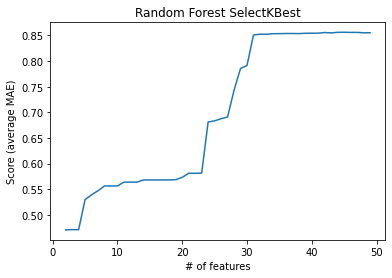

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('# of features')
plt.ylabel('Score (average MAE)')
plt.title('Random Forest SelectKBest')
plt.show()

In [ ]:
high, low = accuracy_score(results)

Highest accuracy score at 45 features of 0.8561
Lowest accuracy score at 2 features of 0.4708


In [ ]:
selector = SelectKBest(f_regression, k=high)
X_new = selector.fit_transform(X_train, y_train)
rf_model = best_rf_model.fit(X_new, y_train)

selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X_train.index, 
                                 columns=X_train.columns)

selected_cols_rf = selected_features.columns[selected_features.var() != 0]
pred = np.exp(rf_model.predict(X_valid[selected_cols_rf]))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Accuracy: %f" %(r2_score(np.exp(y_valid), pred)))
print("MSE: %f" %(mean_squared_error(np.exp(y_valid), pred)))
print("MAE: %f" %(mean_absolute_error(np.exp(y_valid), pred)))

Accuracy: 0.856122
MSE: 3129421.828693
MAE: 897.673245
